In [55]:

import pandas as pd
import numpy as np
import os 
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
here = Path.cwd()
root = next(p for p in [here, *here.parents] if (p / "data" / "raw").exists())

df = pd.read_csv(root / "data" / "raw" / "android_turns.csv", header=0)
df.head()

,init_time,eventAction,payloadCreation,eventStart,eventEnd,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventStartLatitude,...,gpsMedianLateralAccel,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius,validity_mean
0,1.172144e+08,1,1,670340.75,677584.90,4,10.394929,7.244125,0.016991,41.774303,...,0.738191,0.800598,0.854956,8.662511,9.521707,67.59688,69.319600,22.941639,20.335337,1
1,1.172144e+08,1,1,250180.31,257678.03,4,9.401910,7.497719,0.016103,41.802270,...,0.926223,1.051501,1.147173,9.708605,11.245602,80.07132,84.723694,20.737572,21.819538,1
2,1.122337e+09,1,1,852694.94,860628.70,4,6.750588,7.933750,0.012202,41.822826,...,1.197002,1.415529,1.806123,20.356073,2.534807,249.20390,20.211075,18.100092,8.500866,1
3,1.122337e+09,1,1,778673.60,783632.25,5,10.084871,4.958625,0.014104,41.822826,...,1.343501,2.203393,4.873099,16.093168,4.245962,162.20609,21.221228,20.195393,14.847904,1
4,1.122337e+09,1,1,711669.90,716628.94,4,5.592350,4.959063,0.009630,41.822876,...,2.485116,2.862883,3.406215,29.804018,1.212521,295.70374,6.061072,209.791600,3.592705,1


In [57]:
df.columns.to_list()

['init_time',
 'eventAction',
 'payloadCreation',
 'eventStart',
 'eventEnd',
 'eventType',
 'eventSampleSpeed',
 'eventDurationSeconds',
 'eventMilesDriven',
 'eventStartLatitude',
 'eventStartLongitude',
 'eventEndLatitude',
 'eventEndLongitude',
 'eventSensorDetectionMthd',
 'eventGPSSignalStrength',
 'eventStartSpeed',
 'eventEndSpeed',
 'eventSpeedChange',
 'memsMedianLateralAccel',
 'memsP75LateralAccel',
 'memsP95LateralAccel',
 'memsMedianHorizontalNorm',
 'memsP75HorizontalNorm',
 'memsP95HorizontalNorm',
 'gpsMedianLateralAccel',
 'gpsP75LateralAccel',
 'gpsP95LateralAccel',
 'bearing_angular_change_per_second',
 'gyro_angular_change_per_second',
 'bearingAngleChange',
 'gyroAngleChange',
 'mems_radius',
 'gps_radius',
 'validity_mean']

In [58]:
# Dropping irrelevent features (explanation in Notion)
df = df.drop(
    ['eventAction', 'eventSpeedChange', 'payloadCreation',
     'validity_mean', 'init_time', 'eventStart', 'eventEnd', 'eventStartLatitude',
     'eventStartLongitude', 'eventEndLatitude', 'eventEndLongitude'],
    axis=1
)

df.columns.to_list()

['eventType',
 'eventSampleSpeed',
 'eventDurationSeconds',
 'eventMilesDriven',
 'eventSensorDetectionMthd',
 'eventGPSSignalStrength',
 'eventStartSpeed',
 'eventEndSpeed',
 'memsMedianLateralAccel',
 'memsP75LateralAccel',
 'memsP95LateralAccel',
 'memsMedianHorizontalNorm',
 'memsP75HorizontalNorm',
 'memsP95HorizontalNorm',
 'gpsMedianLateralAccel',
 'gpsP75LateralAccel',
 'gpsP95LateralAccel',
 'bearing_angular_change_per_second',
 'gyro_angular_change_per_second',
 'bearingAngleChange',
 'gyroAngleChange',
 'mems_radius',
 'gps_radius']

In [59]:
df.describe()

/Users/shazi/Documents/VS Code/Arity - BTT Project 1/.venv/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianLateralAccel,memsP75LateralAccel,...,memsP95HorizontalNorm,gpsMedianLateralAccel,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius
count,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,...,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1.287000e+03,1287.000000
mean,4.523699,14.946815,5.077658,0.020209,1.160839,11.130416,13.879207,16.552604,1.072062,1.571933,...,2.854002,1.584755,2.153974,2.536275,13.946347,12.876137,75.671681,64.223652,2.888760e+03,inf
std,0.499632,7.874324,2.480706,0.023499,0.875494,23.344923,8.793508,8.473080,0.959199,1.132999,...,2.084157,0.746833,1.136350,1.432142,6.435707,6.086892,37.372321,33.693333,5.436544e+04,NaN
min,4.000000,5.023032,0.941563,0.000263,0.000000,0.590333,0.153224,0.022369,0.000000,0.007220,...,0.271653,0.000000,0.252865,0.252865,0.743536,0.000904,1.317169,0.002726,7.547117e-01,2.543214
25%,4.000000,10.071933,3.910750,0.009366,0.000000,2.805208,7.869826,11.194923,0.345431,0.817457,...,1.989914,1.038555,1.482721,1.706093,9.417365,8.339294,51.685394,37.994030,9.810185e+00,15.596876
50%,5.000000,13.378889,4.673172,0.013994,1.000000,4.229379,11.787764,15.949382,0.954211,1.395912,...,2.628992,1.543021,2.051562,2.375588,13.873839,13.653311,78.584520,72.812454,1.733225e+01,22.364180
75%,5.000000,17.539583,5.831625,0.020853,2.000000,10.969387,17.230714,20.399705,1.612407,2.102699,...,3.244440,2.017892,2.596797,2.953982,17.208571,17.275597,88.142812,86.798210,3.806689e+01,38.547116
max,5.000000,54.317898,24.402876,0.165941,2.000000,293.877560,55.186930,54.742170,12.974553,13.458132,...,46.254982,6.323646,15.997397,17.040415,76.024300,39.642400,334.008360,260.850680,1.706824e+06,inf


In [60]:
# Graphing Numeric Features
numeric_features = [
    'eventSampleSpeed',
    'eventStartSpeed',
    'eventEndSpeed',
    'eventDurationSeconds',
    'eventMilesDriven',
    'eventGPSSignalStrength'
]

In [61]:
# quick look for outliers and negative values
df[numeric_features].describe()

,eventSampleSpeed,eventStartSpeed,eventEndSpeed,eventDurationSeconds,eventMilesDriven,eventGPSSignalStrength
count,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000
mean,14.946815,13.879207,16.552604,5.077658,0.020209,11.130416
std,7.874324,8.793508,8.473080,2.480706,0.023499,23.344923
min,5.023032,0.153224,0.022369,0.941563,0.000263,0.590333
25%,10.071933,7.869826,11.194923,3.910750,0.009366,2.805208
50%,13.378889,11.787764,15.949382,4.673172,0.013994,4.229379
75%,17.539583,17.230714,20.399705,5.831625,0.020853,10.969387
max,54.317898,55.186930,54.742170,24.402876,0.165941,293.877560


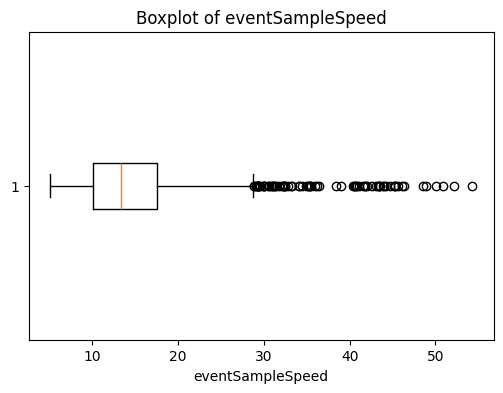

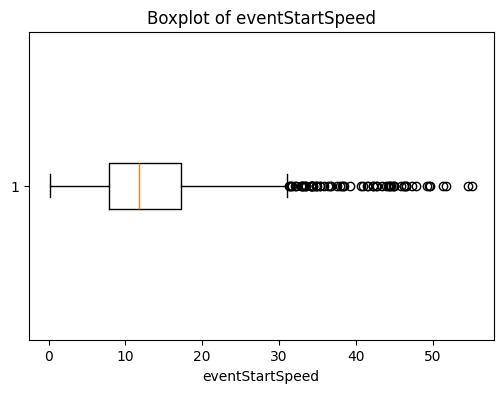

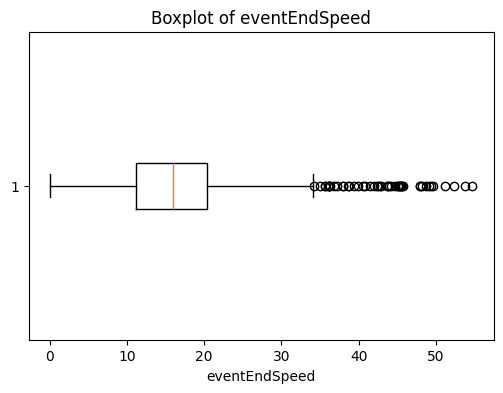

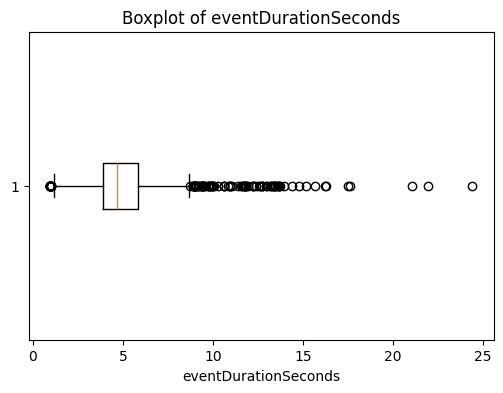

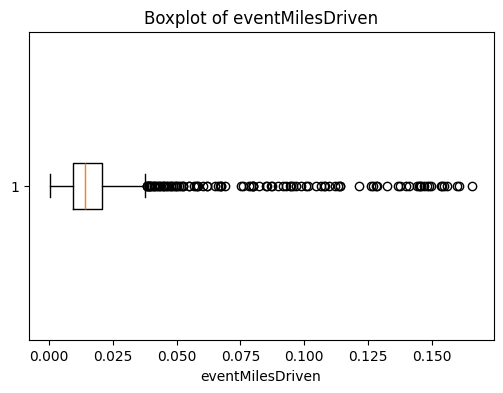

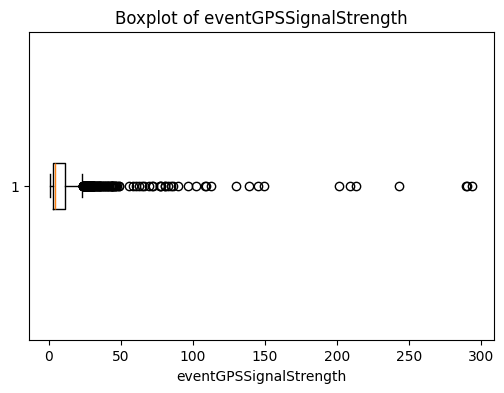

In [62]:
# Boxplots for all numeric features
for col in numeric_features:
    plt.figure(figsize=(6,4))
    plt.boxplot(df[col], vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

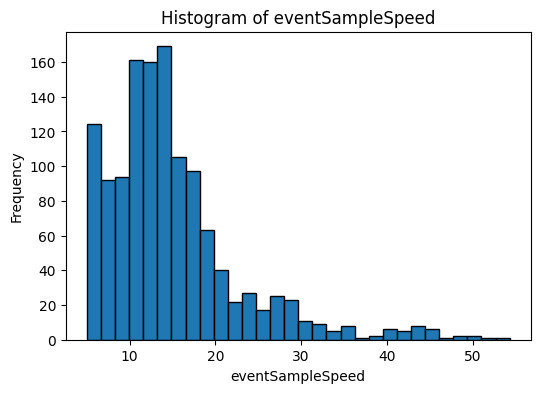

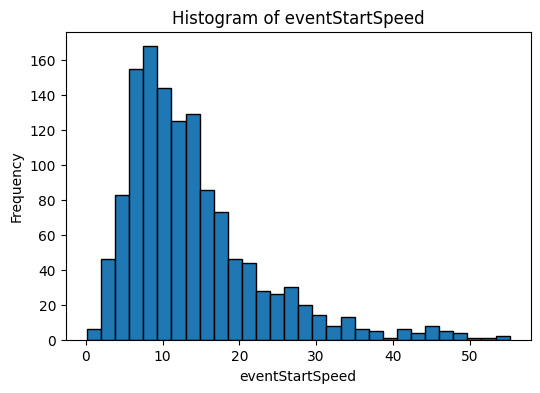

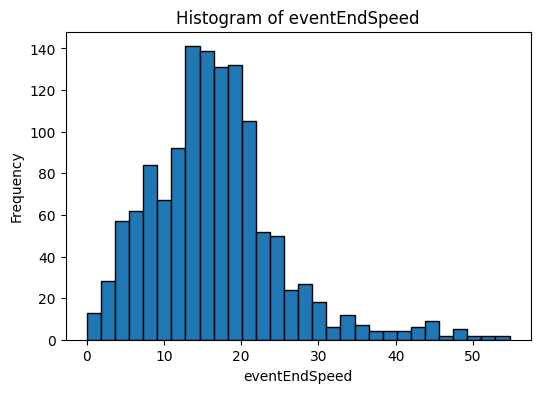

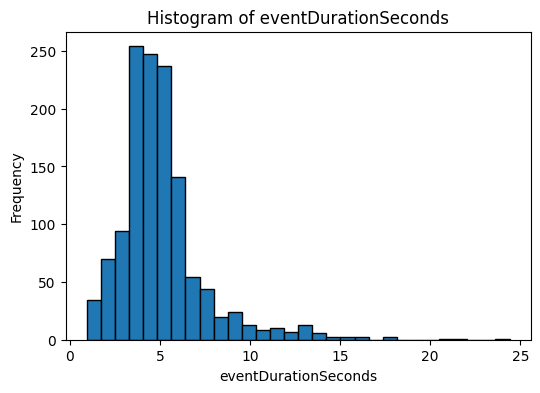

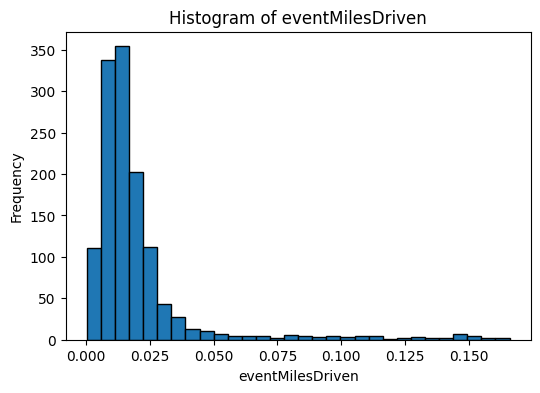

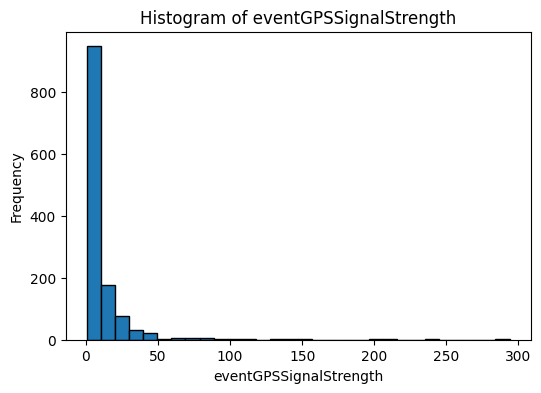

In [63]:
# Histograms for all numeric features
for col in numeric_features:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [64]:
print(df[df['eventGPSSignalStrength'] >= 50].shape)
print(df[df['eventGPSSignalStrength'] >= 50].shape[0] / df.shape[0] * 100, "% of data has GPS signal strength >= 50"
)

(34, 23)
2.641802641802642 % of data has GPS signal strength >= 50


In [ ]:
print(df[df['eventGPSSignalStrength'] >= 10].shape)
print(df[df['eventGPSSignalStrength'] >= 10].shape[0] / df.shape[0] * 100, "% of data has GPS signal strength >= 10"
)

(356, 23)
27.66122766122766 % of data has GPS signal strength >= 50


In [66]:
# eventDurationSeconds had outliers and unreasonable timestamps at around the 15 second mark
df = df[df['eventDurationSeconds'] <= 15]
df.shape

(1278, 23)

In [67]:
# for eventGPSSignalStrength, there's pro's and con's to the cutoff at 50 vs 70, 50 is cleaner, 
# 70 offers data to edge cases, not sure which to use
df = df[df['eventGPSSignalStrength'] <= 50]
df.shape

(1245, 23)

In [68]:
df[df['eventGPSSignalStrength'] <= 10].shape

(926, 23)

In [69]:
#checking to see if any features are missing, none it seem :D
df.drop(numeric_features,  axis = 1).columns.to_list()

['eventType',
 'eventSensorDetectionMthd',
 'memsMedianLateralAccel',
 'memsP75LateralAccel',
 'memsP95LateralAccel',
 'memsMedianHorizontalNorm',
 'memsP75HorizontalNorm',
 'memsP95HorizontalNorm',
 'gpsMedianLateralAccel',
 'gpsP75LateralAccel',
 'gpsP95LateralAccel',
 'bearing_angular_change_per_second',
 'gyro_angular_change_per_second',
 'bearingAngleChange',
 'gyroAngleChange',
 'mems_radius',
 'gps_radius']

In [70]:
# android data cleaned !!!
# saving into cleaned csv file
df.to_csv(root / "data" / "processed" / "android"/ "parent_clean.csv", index=False)

In [71]:
# checking csv file against this df
print(df.shape)
df_check = pd.read_csv(root / "data" / "processed" / "android"/ "parent_clean.csv", header = 0)
print(df_check.shape)

(1245, 23)
(1245, 23)


In [72]:
# YIPPEE!!!